In [65]:
# Importuri
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [66]:
# Macro
PI = np.pi

In [67]:
# Ex 1

# a
df = pd.read_csv('train-lab5.csv')

time_column = 'Datetime'

df[time_column] = pd.to_datetime(df[time_column], format='%d-%m-%Y %H:%M')

# diferența de timp intre esantioane consecutive
time_diff = df[time_column].diff().mean()

sampling_frequency = 1 / time_diff.total_seconds()
print("Frecventa de esantionare este:", sampling_frequency, "Hz")

Frecventa de esantionare este: 0.0002777777777777778 Hz


In [68]:
# b
start_time = df[time_column].min()
end_time = df[time_column].max()

time_interval = end_time - start_time

print("Intervalul de timp acoperit de esantioane este:", time_interval)

Intervalul de timp acoperit de esantioane este: 761 days 23:00:00


In [69]:
# c
signal = df['Count']
N = len(signal)
signal_fft = np.fft.fft(signal)
frequencies = np.fft.fftfreq(N, d=1/sampling_frequency)

max_frequency_index = np.argmax(np.abs(signal_fft[1:N//2])) + 1  # +1 pentru a evita componenta continua

max_frequency = frequencies[max_frequency_index]

print("Frecventa maxima este: ", max_frequency)

Frecventa maxima este:  1.518907358802372e-08


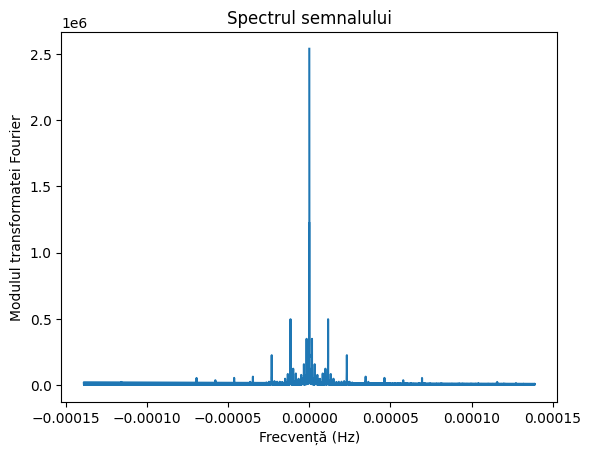

In [70]:
# d
magnitude = np.abs(signal_fft)
plt.plot(frequencies, magnitude)
plt.xlabel("Frecvență (Hz)")
plt.ylabel("Modulul transformatei Fourier")
plt.title("Spectrul semnalului")
plt.show()

In [71]:
# e
X = np.fft.fft(signal)
X = np.abs(X) / N

frequencies = np.fft.fftfreq(N, d=time_diff.total_seconds())
frequencies = frequencies[:N//2]

mean_signal = signal.mean()

if mean_signal != 0:
    print("Semnalul are o componentă continuă cu valoarea:", mean_signal)
else:
    print("Semnalul nu are componentă continuă (DC offset).")
    
# Eliminăm componenta continuă (DC offset)
signal = signal - mean_signal
signal_fft = np.fft.fft(signal)
frequencies = np.fft.fftfreq(N, d=1/sampling_frequency)

Semnalul are o componentă continuă cu valoarea: 138.95811461067368


In [72]:
# f

# Identificati cele mai mari 4 varfuri ale modulului transformatei Fourier
top_indices = np.argsort(np.abs(signal_fft))[-4:][::-1]
top_frequencies = frequencies[top_indices]

# cele mai mari 4 frecvențe si corespunzatoarele amplitudini
for i, index in enumerate(top_indices):
    frequency = top_frequencies[i]
    amplitude = np.abs(signal_fft[index])
    print(f"Frecventa principala {i+1}: {frequency} Hz, Amplitudine: {amplitude}")


Frecventa principala 1: -1.518907358802372e-08 Hz, Amplitudine: 1222623.3489580338
Frecventa principala 2: 1.518907358802372e-08 Hz, Amplitudine: 1222623.3489580338
Frecventa principala 3: -3.037814717604744e-08 Hz, Amplitudine: 644088.23542051
Frecventa principala 4: 3.037814717604744e-08 Hz, Amplitudine: 644088.2354205099


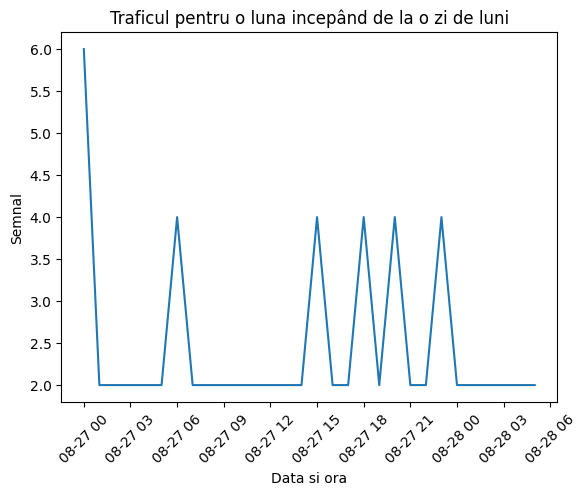

In [73]:
# g
# esantionul de start pentru o zi de luni
start_day_index = df[df[time_column].dt.weekday == 0].index[0]
# datele pentru urmatoarele 30 de zile
end_day_index = start_day_index + 30
df_subset = df.iloc[start_day_index:end_day_index]
plt.plot(df_subset[time_column], df_subset['Count'])
plt.xlabel("Data si ora")
plt.ylabel("Semnal")
plt.title("Traficul pentru o luna incepând de la o zi de luni")
plt.xticks(rotation=45)
plt.show()